In [1]:
import click
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import os
import shutil
import joblib
import json
from shutil import copytree

In [65]:
def main(path):
    splitsort = []
    smaller = []
    print(path)
    for i in sorted(glob(os.path.join(path, '*log.csv'))):
        
        splitname = os.path.basename(i).split('_')
        if len(splitname)==3 and int(splitname[0])!=0:
            splitsort.append((int(splitname[0]),i))
        elif len(splitname)==2:
            smaller.append(i)
    
    if len(splitsort)!=0:
        dirs = list(np.array(sorted(splitsort))[:,1]) + smaller
    else:
        dirs = smaller
    loss = []
    for i in dirs:
        # print(f"Processing file: {i}")
        # print(i)
        loss.append(split(i))  # Get only the loss values (assumed to be in the second column)

    
    plt.plot(*np.vstack(loss).T)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.show()
    return np.max(np.vstack(loss)[:,0]).astype(int)

def split(path):
    """Helper function to read CSV file and extract required columns."""
    with open(path, 'r') as f:
        save = pd.read_csv(path)[['Iteration','Cost']].dropna()
    return save.values

In [66]:
os.path.join(os.path.expanduser('~'),"rerun_BSE/5")+"/*/*model_log.csv"

'/home/grierjones/rerun_BSE/5/*/*model_log.csv'

/home/grierjones/qregress/qml_DDCC/RUD_AL/5RUD/A2_HWE-CNOT


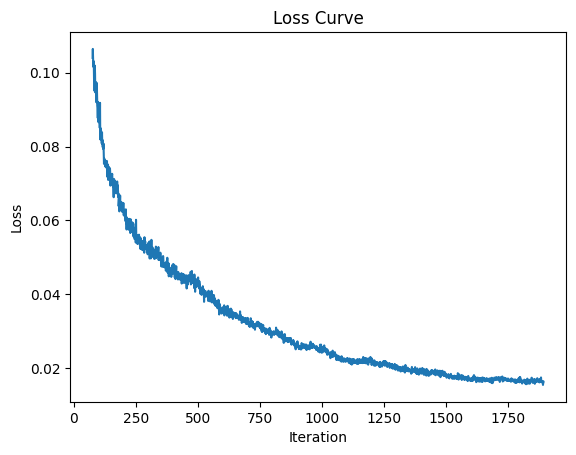

1891
/home/grierjones/qregress/qml_DDCC/RUD_AL/5AL/A2_HWE-CNOT


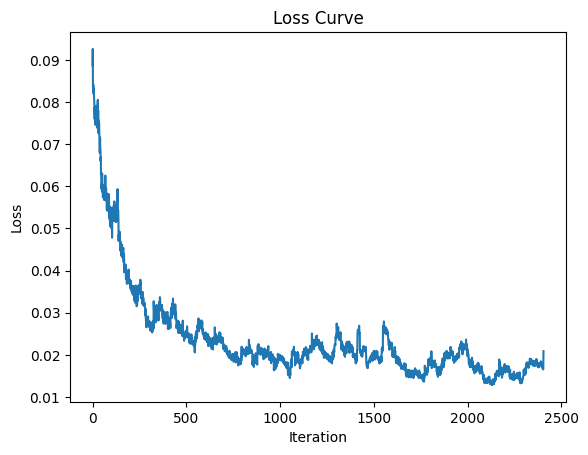

2405
/home/grierjones/qregress/qml_DDCC/RUD_AL/9AL/A2_HWE-CNOT


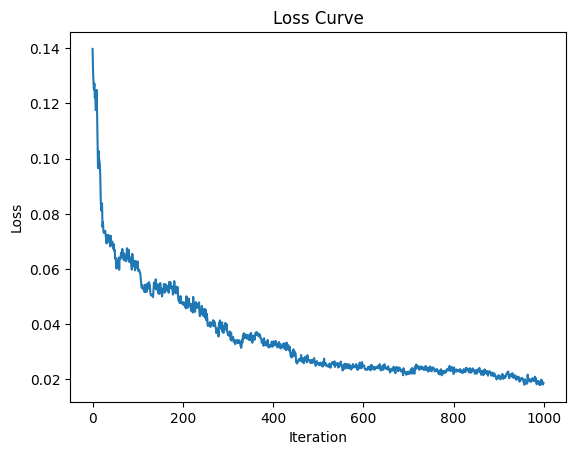

999
/home/grierjones/qregress/qml_DDCC/RUD_AL/7AL/A2_HWE-CNOT


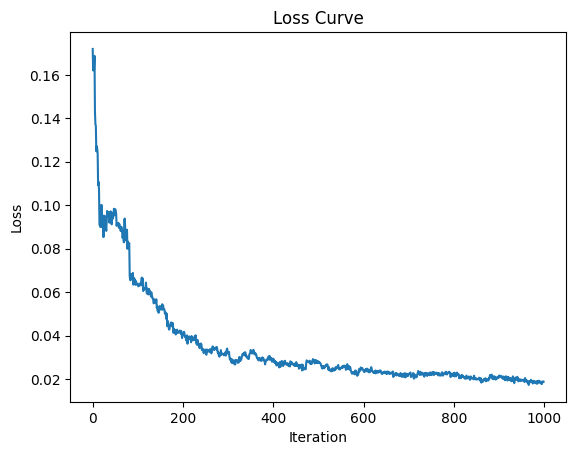

999
/home/grierjones/qregress/qml_DDCC/RUD_AL/3RUD/A2_HWE-CNOT


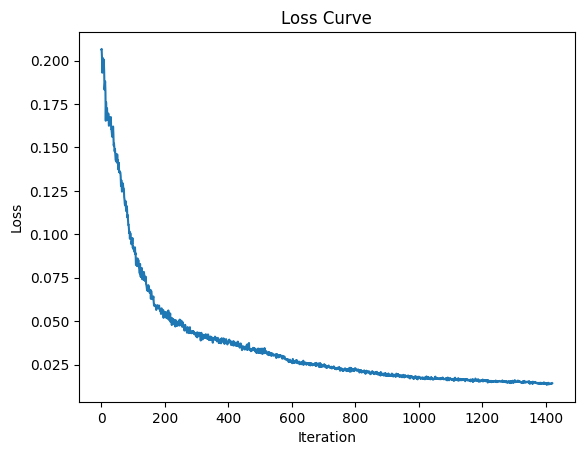

1420
/home/grierjones/qregress/qml_DDCC/RUD_AL/3AL/A2_HWE-CNOT


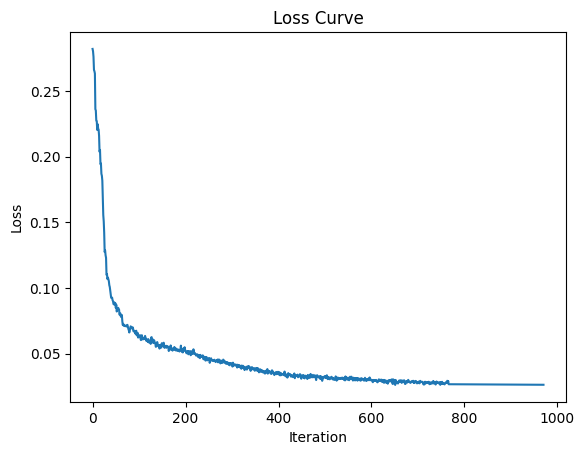

970
/home/grierjones/qregress/qml_DDCC/RUD_AL/7RUD/A2_HWE-CNOT


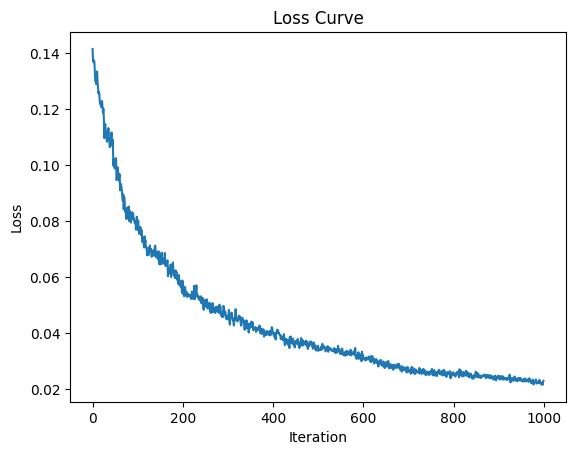

999


In [67]:
rerun = []
# for i in glob('qml_DDCC/5/*/*_results.json'):
for i in glob(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/RUD_AL/*/A2_HWE-CNOT')):
# for i in glob(os.path.join(os.path.expanduser('~'),"rerun_BSE/5")+"/*/model_log.csv"):
# for i in glob('function-calc-test/sixteenqubit_test/quad16qubit/*/*model_log.csv'):
    iters = main(i)
    print(iters)
    # if iters!=1000:
    #     print(i,iters)
    #     rerun.append((os.path.dirname(i),1000-iters))
    


In [ ]:
# rerun = []
# for i in glob('BSE-calc-test/16qubit/*/*results.json'):
# # for i in glob('function-calc-test/sixteenqubit_test/quad16qubit//*/model_log.csv'):
#     iters = main(os.path.dirname(i))
#     if iters!=1000:
#         # print(i,iters)
#         rerun.append((os.path.dirname(i),1000-iters))
#     # print(iters)

# rerundir = os.path.join(os.path.expanduser('~'),'rerun_BSE/16/')
# for p,iters in rerun:
#     copytree(p,os.path.join(rerundir,os.path.basename(p)))
#     filename = os.path.join(rerundir,os.path.basename(p),os.path.basename(p)+'.json')
    
#     with open(filename,'r') as f:
#         file = json.load(f)
#     file['MAX_ITER']=iters 
    
#     with open(filename,'w') as g:
#         json.dump(file,g)

In [ ]:
stacked_log=[]
for idx,i in enumerate(glob('BSE-calc-test/16qubit/*/model_log.csv')):
# for idx,i in enumerate(sorted(glob('function-calc-test/fivequbit_tests/sin5qubit/*/model_log.csv'))):
# for i in glob('function-calc-test/sixteenqubit_test/lin16qubit/*/model_log.csv'):    
    df=pd.read_csv(i)[['Iteration','Cost']].dropna()
    if df.shape[0]!=1000:
        print(i,idx,df.shape[0])
        stacked_log.append(df)    
        sns.lineplot(data=df,x='Iteration',y='Cost')
# plt.xlim(0,1000)
plt.show()
# for i in glob('BSE_RUD_AL_test/16qubit/5_RUD/*/model_log.csv'):
#     df=pd.read_csv(i)[['Iteration','Cost']].dropna()
#     stacked_log.append(df)

In [ ]:
sns.lineplot(data=pd.concat(stacked_log),x='Iteration',y='Cost')
plt.xlim(0,1000)

In [ ]:
def main(path):

    with open(path,'r') as f:
        filename=f.readlines()
    
    save=[]
    for i in filename:
        if ':' in i:
            splitf=i.split(',')
            save.append((splitf[1],splitf[2]))
    
    save=np.array(save).astype(float)
    
    plt.plot(save[:,0],save[:,1])
    plt.show()
